# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | mayo
Processing Record 3 of Set 1 | grand gaube
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | uniao da victoria
City not found. Skipping...
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | svetlyy
Processing Record 10 of Set 1 | igarka
Processing Record 11 of Set 1 | hovd
Processing Record 12 of Set 1 | kiama
Processing Record 13 of Set 1 | coruripe
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | codrington
Processing Record 23 of Set 

City not found. Skipping...
Processing Record 38 of Set 4 | terrace
Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | yeppoon
Processing Record 41 of Set 4 | ixtapa
Processing Record 42 of Set 4 | narsaq
Processing Record 43 of Set 4 | parakou
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | fremont
Processing Record 46 of Set 4 | gravelbourg
Processing Record 47 of Set 4 | mandalgovi
Processing Record 48 of Set 4 | phan rang
City not found. Skipping...
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 0 of Set 5 | arkhangelskoye
Processing Record 1 of Set 5 | treinta y tres
Processing Record 2 of Set 5 | cravo norte
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | aykhal
Processing Record 6 of Set 5 | leh
Processing Record 7 of Set 5 | nueve de julio
Processing Record 8 of Set 5 | salalah
Processing Record 9 of Set 5 | grand river south

Processing Record 25 of Set 8 | kaeo
Processing Record 26 of Set 8 | kushiro
Processing Record 27 of Set 8 | sydney
Processing Record 28 of Set 8 | eureka
Processing Record 29 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | jiamusi
Processing Record 32 of Set 8 | pangnirtung
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | kanniyakumari
Processing Record 35 of Set 8 | joensuu
Processing Record 36 of Set 8 | warwick
Processing Record 37 of Set 8 | mahebourg
Processing Record 38 of Set 8 | kosh-agach
Processing Record 39 of Set 8 | kauhajoki
Processing Record 40 of Set 8 | upington
Processing Record 41 of Set 8 | tarakan
Processing Record 42 of Set 8 | deputatskiy
Processing Record 43 of Set 8 | rawson
Processing Record 44 of Set 8 | broome
Processing Record 45 of Set 8 | padang
Processing Record 46 of Set 8 | chokurdakh
Processing Record 47 of Set 8 | kishtwar
Processing Record 48 of Set

Processing Record 13 of Set 12 | margate
Processing Record 14 of Set 12 | marawi
Processing Record 15 of Set 12 | paraiso
Processing Record 16 of Set 12 | rosario
Processing Record 17 of Set 12 | linqiong
Processing Record 18 of Set 12 | harper
Processing Record 19 of Set 12 | erzin
Processing Record 20 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 12 | acari
Processing Record 22 of Set 12 | praia da vitoria
Processing Record 23 of Set 12 | sarkikaraagac
Processing Record 24 of Set 12 | ostersund
Processing Record 25 of Set 12 | sunnyside
Processing Record 26 of Set 12 | turayf
Processing Record 27 of Set 12 | polunochnoye
Processing Record 28 of Set 12 | mogadishu
Processing Record 29 of Set 12 | peleduy
Processing Record 30 of Set 12 | zhigansk
Processing Record 31 of Set 12 | horta
Processing Record 32 of Set 12 | suihua
Processing Record 33 of Set 12 | palmer
Processing Record 34 of Set 12 | balkhash
Processing Record 35 of Set 12 | storslett
Processing Record 3

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,298.86,81,75,4.12,US,1684468429
1,mayo,38.8876,-76.5119,289.38,72,0,6.69,US,1684468347
2,grand gaube,-20.0064,57.6608,297.25,79,6,1.34,MU,1684468429
3,bredasdorp,-34.5322,20.0403,283.72,76,99,1.81,ZA,1684468429
4,kaitangata,-46.2817,169.8464,283.76,90,100,1.94,NZ,1684468429


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,298.86,81,75,4.12,US,1684468429
1,mayo,38.8876,-76.5119,289.38,72,0,6.69,US,1684468347
2,grand gaube,-20.0064,57.6608,297.25,79,6,1.34,MU,1684468429
3,bredasdorp,-34.5322,20.0403,283.72,76,99,1.81,ZA,1684468429
4,kaitangata,-46.2817,169.8464,283.76,90,100,1.94,NZ,1684468429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

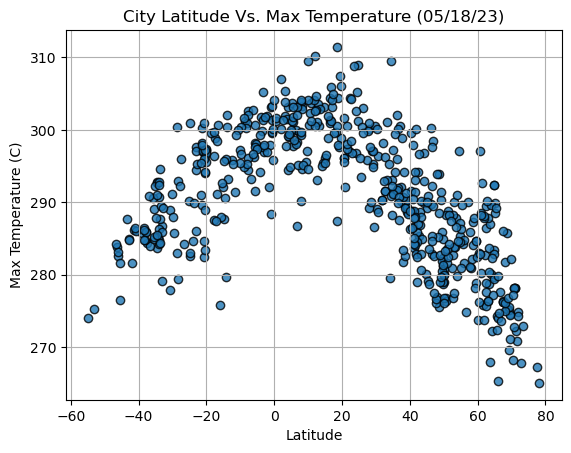

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

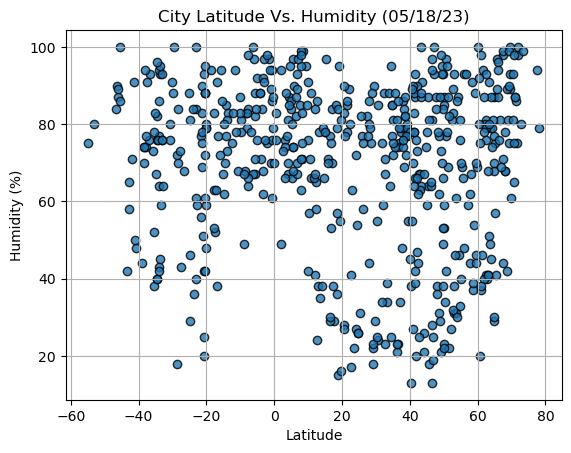

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

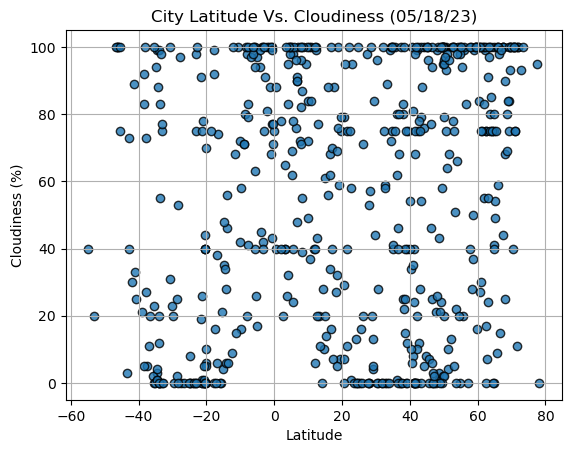

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

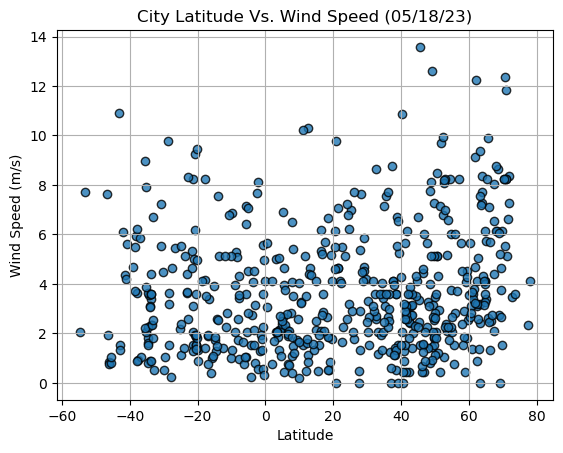

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, y_label, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, color="r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,298.86,81,75,4.12,US,1684468429
1,mayo,38.8876,-76.5119,289.38,72,0,6.69,US,1684468347
5,georgetown,5.4112,100.3354,301.12,74,40,4.63,MY,1684468166
7,svetlyy,54.6750,20.1347,285.35,76,100,3.74,RU,1684468430
8,igarka,67.4667,86.5833,276.22,98,100,4.40,RU,1684468430


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grand gaube,-20.0064,57.6608,297.25,79,6,1.34,MU,1684468429
3,bredasdorp,-34.5322,20.0403,283.72,76,99,1.81,ZA,1684468429
4,kaitangata,-46.2817,169.8464,283.76,90,100,1.94,NZ,1684468429
6,busselton,-33.6500,115.3333,294.55,45,83,3.41,AU,1684468430
10,kiama,-34.6833,150.8667,292.80,40,3,1.63,AU,1684468431


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8264294091055919


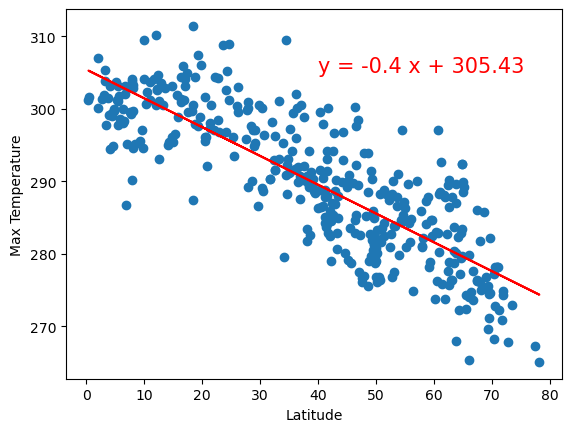

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (40,305))


The r-squared is: 0.7368962251358105


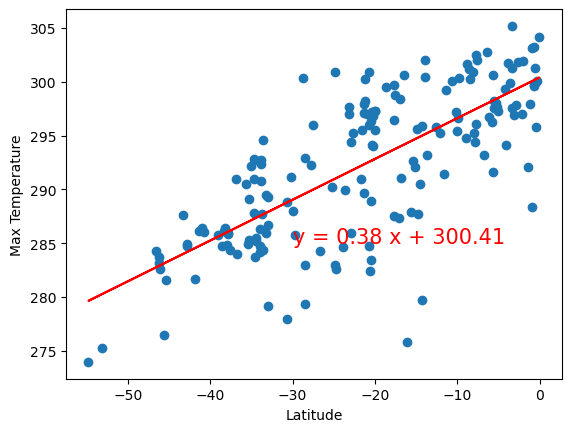

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (-30,285))


**Discussion about the linear relationship:** There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere. The temperature decreases as the latitude increase.
The linear relationship between the maximum temperature and Latitude for the Southern Hemisphere is a strong positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.013834011769367901


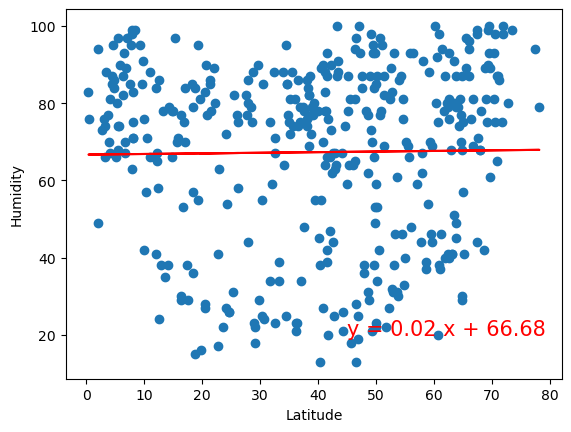

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45,20))


The r-squared is: 0.1626093508983228


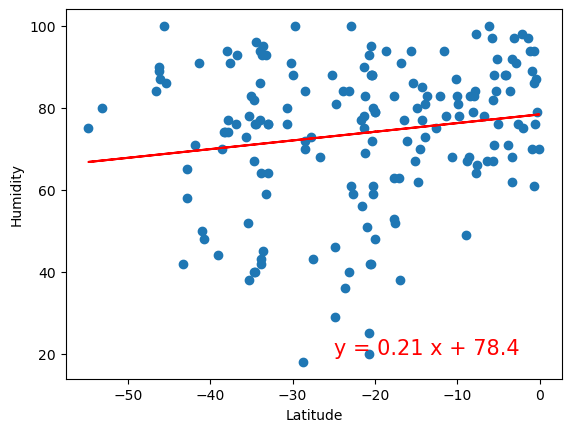

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,20))

**Discussion about the linear relationship: The linear relationship between the Humidity and Latitude for both the Northern and Southern Hemispheres show very weak positive correlation

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11135911022550977


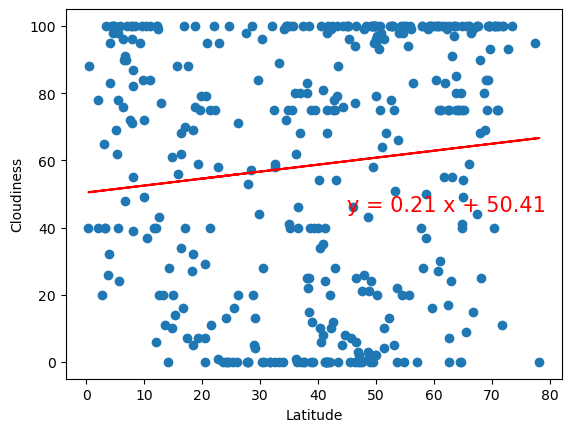

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,45))

The r-squared is: 0.25340522348307204


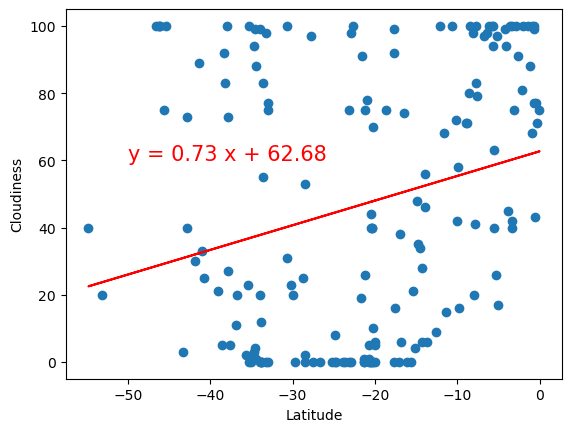

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50,60))

**Discussion about the linear relationship:** The linear relationship between Cloudiness and Latitudes for Northern Hemisphere and Southern Hemisphere are weak positive correlations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.2499967452921299


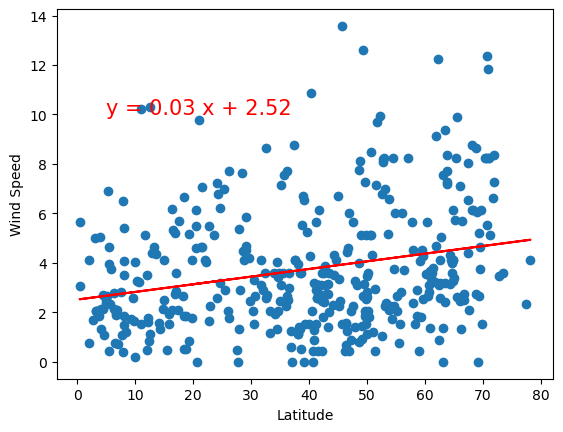

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (5,10))

The r-squared is: -0.08234580273773813


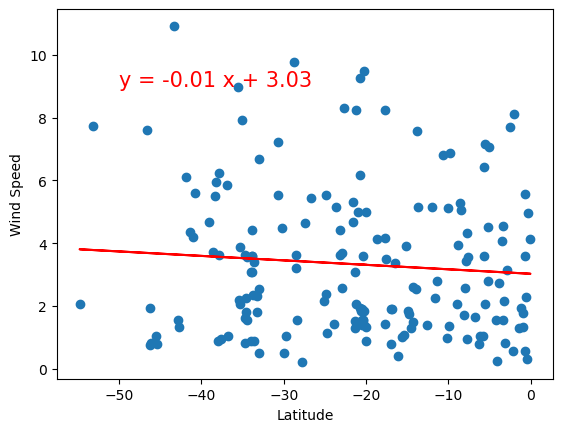

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50,9))

**Discussion about the linear relationship:** The linear relationship between Wind Speed and Latitude for the Northern Hemisphere is a weak positive correlation while there is very weak negative relationship between Wind Speed and Southern Hemisphere Latitudes